In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.

**Lectura del Dataset - Datos demográficos de Género - Datos de DOMINIOS**

In [5]:
colnames = ['device_idx','label','feature_type','feature_detail', 'age']
df_analisis_exp = pd.read_csv('df_demografico_ar.csv', usecols=colnames)
df_analisis_exp = df_analisis_exp[(df_analisis_exp['feature_type']=='dom')]

print('Tamaño del Dataset:',df_analisis_exp.shape)
print('\n')
print('Valores únicos en cada columna \n',df_analisis_exp.nunique())
print('Feauters type', df_analisis_exp['feature_type'].unique())
df_analisis_exp.head(3)

Tamaño del Dataset: (381200, 5)


Valores únicos en cada columna 
 device_idx        99469
label                 2
feature_type          1
feature_detail     1587
age                   6
dtype: int64
Feauters type ['dom']


,device_idx,label,feature_type,feature_detail,age
9,392.0,2.0,dom,bumeran.com.ar,6.0
15,930.0,2.0,dom,zonajobs.com.ar,5.0
29,1145.0,2.0,dom,veadigital.com.ar,5.0


Existen 381.200 filas con datos de dominio. Los cuales se reparten en 99.469 dispositivos únicos, que poseen datos de dominios visitados.   
De estas 381.200 filas, 1587 dominios son únicos. Los dominios se repetirán por cada dispositivo que lo visite.

In [6]:
#DONE - Dominios: tipo de paginas (ex: pagina de empleos, pagina de entretenimiento, página de propiedades, página deportes)
#Dominios y ULRS: cuántas paginas visitó cada persona de ESE Dominio. Saber si la persona vio 1 empelo o 500 empleos por ej.
#Para esto ultimo, descargar el dataset incluyendo el feature type 'url'. Habra que separar el string dejando el dominio separado
#luego hacerlo coincidir con el feature dominio, y hacer la matriz de cant urls por dispositivo (fila) vs dom (col)
#Esto ultimo formaria parte del analisis de URLS

**Valores Nulos**

In [7]:
print(df_analisis_exp.isnull().sum())

device_idx        0
label             0
feature_type      0
feature_detail    0
age               0
dtype: int64


No hay valores nulos en el dataset.

**Valores duplicados**

In [8]:
pd.DataFrame(df_analisis_exp.groupby(['device_idx','feature_detail'])['feature_type'].count())\
                            .sort_values('feature_type', ascending=False)

feature_type
device_idx feature_detail                                     
1.0        caras.perfil.com                                  1
67761.0    exitoina.perfil.com                               1
67764.0    buenosaires.gob.ar                                1
67763.0    zonaprop.com.ar                                   1
67762.0    tarjetas-de-credito.credisense.com.ar             1
...                                                        ...
33681.0    cronista.com                                      1
           cipitria.com.ar                                   1
           bumeran.com.ar                                    1
           buenosaires.gob.ar                                1
101989.0   zonajobs.com.ar                                   1

[381200 rows x 1 columns]

No hay valores duplicados.

**Análisis descriptivo del feature type Dominios**

In [9]:
data = df_analisis_exp.copy()

               feature_detail  # Devices Unique
211            bumeran.com.ar             30364
208        buenosaires.gob.ar             26834
1581          zonajobs.com.ar             25641
1582          zonaprop.com.ar             20494
358              cronista.com             16756
438              disco.com.ar             16287
1502        veadigital.com.ar             15362
938   miba.buenosaires.gob.ar             10025
790              jumbo.com.ar              8435
972           movistar.com.ar              6216

 Eje x: Cantidad de dispositivos únicos, Eje y: Cantidad de dominios únicos


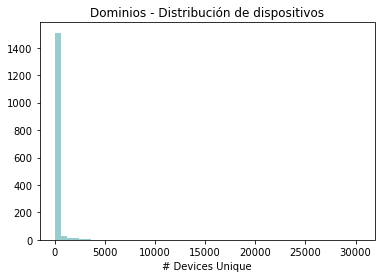

In [10]:
data_grafico = data[['device_idx','feature_detail']]
data_grafico = data_grafico.groupby(["feature_detail"]).nunique()
print(data_grafico.reset_index().sort_values('device_idx',ascending=False).rename(columns={'device_idx':
                                                                                          '# Devices Unique'}).head(10))
#fig, ax = plt.subplots() 
plt.figure(figsize=(6,4)) 
plt.title("Dominios - Distribución de dispositivos")
# we can pass keyword arguments for each individual component of the plot
#We can pass in the variable we want to visualize along with keyword arguments for each of the individual
#components of the plot.
sns.distplot(data_grafico.reset_index().rename(columns={'device_idx':'# Devices Unique'})['# Devices Unique'], \
             kde=False, hist_kws={'color': 'Teal'});
print('\n Eje x: Cantidad de dispositivos únicos, Eje y: Cantidad de dominios únicos')
#ax.set(xlim=(0,4000))

[(0.0, 10000.0)]

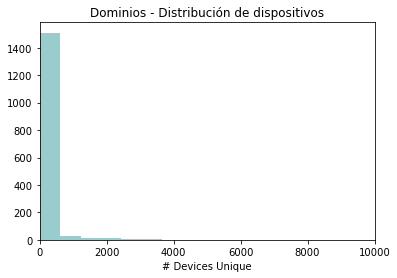

In [11]:
fig, ax = plt.subplots() 
#plt.figure(figsize=(10,6)) 
plt.title("Dominios - Distribución de dispositivos")
# we can pass keyword arguments for each individual component of the plot
#We can pass in the variable we want to visualize along with keyword arguments for each of the individual
#components of the plot.
sns.distplot(data_grafico.reset_index().rename(columns={'device_idx':'# Devices Unique'})['# Devices Unique'], \
             kde=False, hist_kws={'color': 'Teal'});
ax.set(xlim=(0,10000))

[(0.0, 2000.0)]

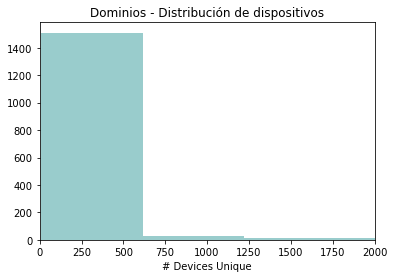

In [12]:
fig, ax = plt.subplots() 
#plt.figure(figsize=(10,6)) 
plt.title("Dominios - Distribución de dispositivos")
# we can pass keyword arguments for each individual component of the plot
#We can pass in the variable we want to visualize along with keyword arguments for each of the individual
#components of the plot.
sns.distplot(data_grafico.reset_index().rename(columns={'device_idx':'# Devices Unique'})['# Devices Unique'], \
             kde=False, hist_kws={'color': 'Teal'});
ax.set(xlim=(0,2000))

Más de 1400 dominios tienen visitas de entre 0 y 600 dispositivos aproximadamente. Es decir, pocos usuarios visitan muchos dominios distintos.     
Los dominios visitados por más de 10.000 dispositivos son muy pocos. Por lo que pocos dominios concentran a la mayor parte de la población de estudio. En otras palabras, muchos dispositivos visitan pocos dominios específicos.

In [13]:
#pd.options.display.max_rows = None
print('Cantidad de dispositivos que visitan a cada dominio')
pd.DataFrame(data['feature_detail'].value_counts()).rename(columns={'feature_detail':'Devices'})

Cantidad de dispositivos que visitan a cada dominio


,Devices
bumeran.com.ar,30364
buenosaires.gob.ar,26834
zonajobs.com.ar,25641
zonaprop.com.ar,20494
cronista.com,16756
...,...
warnerchannel.com,9
giorgisycompania.com.ar,9
bambuguazu.com,8
globaltimes.cn,8


In [14]:
print('Porcentaje de Dispositivos únicos que visita a cada dominio')
pd.DataFrame(round(data.feature_detail.value_counts()/(data.device_idx.nunique())*100,2)).rename(columns={'feature_detail':
                                                                                                          'Devices'})

Porcentaje de Dispositivos únicos que visita a cada dominio


,Devices
bumeran.com.ar,30.53
buenosaires.gob.ar,26.98
zonajobs.com.ar,25.78
zonaprop.com.ar,20.60
cronista.com,16.85
...,...
warnerchannel.com,0.01
giorgisycompania.com.ar,0.01
bambuguazu.com,0.01
globaltimes.cn,0.01


Porcentaje de Visitas por Dominio - Top 30


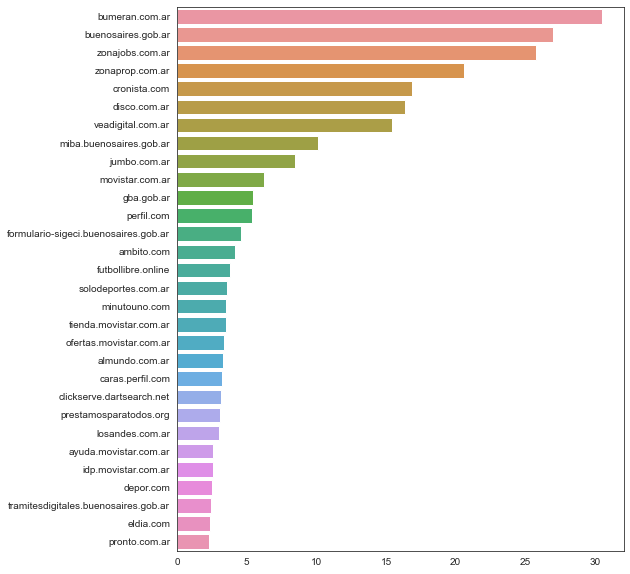

In [30]:
ee = pd.DataFrame(round(data.feature_detail.value_counts()/(data.device_idx.nunique())*100,2)).rename(columns={'feature_detail':
                                                                                                               'Devices'})
ee = ee.head(30)

import matplotlib.pyplot as plt
import seaborn as sns
print('Porcentaje de Visitas por Dominio - Top 30')
plt.rcParams["figure.figsize"] = (8,10)
sns.set_style('white')
#dd is a dataframe
x = ee['Devices'].to_list()
y = ee.index.to_list()

sns.barplot(x, y)
plt.show()

En la tabla anterior se observa el porcentaje de dispositivos únicos que visitan a cada uno de los dominios.   
30% de los dispositivos visita bumeran.com.ar y casi el 27% de dispositivos visita buenosaires.gob.ar.

Dado que existen dominios con muy pocas visitas, se hará una variable nueva que agrupe a aquellos dominios con muy pocos dispositivos en categoría "Otros", bajo el criterio de la suma acumulada.
Cuando se empiecen a sumar dispositivos de forma marginalmente creciente, a partir de ese umbral se contabilizarán en "Otros"

In [16]:
#pd.options.display.max_rows = None
data2=pd.DataFrame(data['feature_detail'].value_counts())
data2=data2['feature_detail'].cumsum()/data.shape[0] #Cummulative Sum
data2

bumeran.com.ar             0.079654
buenosaires.gob.ar         0.150047
zonajobs.com.ar            0.217311
zonaprop.com.ar            0.271073
cronista.com               0.315029
                             ...   
warnerchannel.com          0.999913
giorgisycompania.com.ar    0.999937
bambuguazu.com             0.999958
globaltimes.cn             0.999979
ledesmapropiedades.com     1.000000
Name: feature_detail, Length: 1587, dtype: float64

In [17]:
print("Cummulative distribution of the top 1 of the domains with more devices (%): ",round(data2.iloc[0]*100,3))
print("Cummulative distribution of the top 5 of the domains with more devices (%): ",round(data2.iloc[4]*100,3))
print("Cummulative distribution of the top 10 of the domains with more devices (%): ",round(data2.iloc[9]*100,3))
print("Cummulative distribution of the top 15 of the domains with more devices (%): ",round(data2.iloc[14]*100,3))
print("Cummulative distribution of the top 20 of the domains with more devices (%): ",round(data2.iloc[19]*100,3))
print("Cummulative distribution of the top 25 of the domains with more devices (%): ",round(data2.iloc[24]*100,3))
print("Cummulative distribution of the top 30 of the domains with more devices (%): ",round(data2.iloc[29]*100,3))
print("Cummulative distribution of the top 35 of the domains with more devices (%): ",round(data2.iloc[34]*100,3))
print("Cummulative distribution of the top 40 of the domains with more devices (%): ",round(data2.iloc[39]*100,3))
print("Cummulative distribution of the top 45 of the domains with more devices (%): ",round(data2.iloc[44]*100,3))
print("Cummulative distribution of the top 50 of the domains with more devices (%): ",round(data2.iloc[49]*100,3))
print("Cummulative distribution of the top 55 of the domains with more devices (%): ",round(data2.iloc[54]*100,3))
print("Cummulative distribution of the top 60 of the domains with more devices (%): ",round(data2.iloc[59]*100,3))
print("Cummulative distribution of the top 65 of the domains with more devices (%): ",round(data2.iloc[64]*100,3))
print("Cummulative distribution of the top 70 of the domains with more devices (%): ",round(data2.iloc[69]*100,3))
print("Cummulative distribution of the top 75 of the domains with more devices (%): ",round(data2.iloc[74]*100,3))
print("Cummulative distribution of the top 80 of the domains with more devices (%): ",round(data2.iloc[79]*100,3))
print("Cummulative distribution of the top 85 of the domains with more devices (%): ",round(data2.iloc[84]*100,3))
print("Cummulative distribution of the top 90 of the domains with more devices (%): ",round(data2.iloc[89]*100,3))
print("Cummulative distribution of the top 95 of the domains with more devices (%): ",round(data2.iloc[94]*100,3))
print("Cummulative distribution of the top 100 of the domains with more devices (%): ",round(data2.iloc[99]*100,3))
print("Cummulative distribution of the top 110 of the domains with more devices (%): ",round(data2.iloc[109]*100,3))
print("Cummulative distribution of the top 120 of the domains with more devices (%): ",round(data2.iloc[119]*100,3))
print("Cummulative distribution of the top 150 of the domains with more devices (%): ",round(data2.iloc[149]*100,3))
print("Cummulative distribution of the top 200 of the domains with more devices (%): ",round(data2.iloc[199]*100,3))
print("Cummulative distribution of the top 250 of the domains with more devices (%): ",round(data2.iloc[249]*100,3))
print("Cummulative distribution of the top 300 of the domains with more devices (%): ",round(data2.iloc[299]*100,3))
print("Cummulative distribution of the top 350 of the domains with more devices (%): ",round(data2.iloc[349]*100,3))
print("Cummulative distribution of the top 400 of the domains with more devices (%): ",round(data2.iloc[399]*100,3))
print("Cummulative distribution of the top 450 of the domains with more devices (%): ",round(data2.iloc[449]*100,3))
print("Cummulative distribution of the top 500 of the domains with more devices (%): ",round(data2.iloc[499]*100,3))
print("Cummulative distribution of the top 550 of the domains with more devices (%): ",round(data2.iloc[549]*100,3))
print("Cummulative distribution of the top 600 of the domains with more devices (%): ",round(data2.iloc[599]*100,3))
print("Cummulative distribution of the top 650 of the domains with more devices (%): ",round(data2.iloc[649]*100,3))
print("Cummulative distribution of the top 700 of the domains with more devices (%): ",round(data2.iloc[699]*100,3))

Cummulative distribution of the top 1 of the domains with more devices (%):  7.965
Cummulative distribution of the top 5 of the domains with more devices (%):  31.503
Cummulative distribution of the top 10 of the domains with more devices (%):  46.279
Cummulative distribution of the top 15 of the domains with more devices (%):  52.367
Cummulative distribution of the top 20 of the domains with more devices (%):  56.848
Cummulative distribution of the top 25 of the domains with more devices (%):  60.734
Cummulative distribution of the top 30 of the domains with more devices (%):  63.915
Cummulative distribution of the top 35 of the domains with more devices (%):  66.786
Cummulative distribution of the top 40 of the domains with more devices (%):  69.214
Cummulative distribution of the top 45 of the domains with more devices (%):  71.215
Cummulative distribution of the top 50 of the domains with more devices (%):  73.016
Cummulative distribution of the top 55 of the domains with more devi

In [243]:
data2.reset_index().iloc[89] #A partir de este dominio, la cantidad de dispositivos se suma marginalmente

index             cocinadelirante.com
feature_detail                0.80735
Name: 89, dtype: object

In [244]:
temporal = pd.DataFrame(round(data['feature_detail'].value_counts()/data['device_idx'].nunique()*100,2)).reset_index()
dispositivo_umbral = temporal.reset_index().iloc[89]['feature_detail']

lista_dominios_relevantes = []
for feature_detail, row in temporal.iterrows():
    if float(row['feature_detail']) >= dispositivo_umbral:
        lista_dominios_relevantes.append(str(row['index']))
lista_dominios_relevantes 

['bumeran.com.ar',
 'buenosaires.gob.ar',
 'zonajobs.com.ar',
 'zonaprop.com.ar',
 'cronista.com',
 'disco.com.ar',
 'veadigital.com.ar',
 'miba.buenosaires.gob.ar',
 'jumbo.com.ar',
 'movistar.com.ar',
 'gba.gob.ar',
 'perfil.com',
 'formulario-sigeci.buenosaires.gob.ar',
 'ambito.com',
 'futbollibre.online',
 'solodeportes.com.ar',
 'minutouno.com',
 'tienda.movistar.com.ar',
 'ofertas.movistar.com.ar',
 'almundo.com.ar',
 'caras.perfil.com',
 'clickserve.dartsearch.net',
 'prestamosparatodos.org',
 'losandes.com.ar',
 'ayuda.movistar.com.ar',
 'idp.movistar.com.ar',
 'depor.com',
 'tramitesdigitales.buenosaires.gob.ar',
 'eldia.com',
 'pronto.com.ar',
 'supermercadosdia.com.ar',
 'itau.com.ar',
 'infotechnology.com',
 'exitoina.perfil.com',
 'vix.com',
 'creditosparatodos.org',
 'ausa.com.ar',
 'sv3.futbollibre.net',
 'ypf.com',
 'toyota.com.ar',
 'autocosmos.com.ar',
 'coppel.com.ar',
 'clientes.credicuotas.com.ar',
 'rionegro.com.ar',
 'tuenti.com.ar',
 'serviclub.ypf.com',
 '0221

In [245]:
#New temporal variable
data['feature_detail_2']=np.where(data['feature_detail'].isin(lista_dominios_relevantes),data.feature_detail,'Otros')
data = data.drop('feature_detail', axis=1)
data = data.rename(columns={'feature_detail_2':'feature_detail'})
data.head()

,device_idx,label,feature_type,age,feature_detail
9,392.0,2.0,dom,6.0,bumeran.com.ar
15,930.0,2.0,dom,5.0,zonajobs.com.ar
29,1145.0,2.0,dom,5.0,veadigital.com.ar
30,1145.0,2.0,dom,5.0,bumeran.com.ar
32,1145.0,2.0,dom,5.0,ofertas.movistar.com.ar


In [246]:
print('Cantidad de dispositivos que visitan a cada dominio, con variable dominios agrupada')
pd.DataFrame(data['feature_detail'].value_counts()).rename(columns={'feature_detail':'Devices'})

Cantidad de dispositivos que visitan a cada dominio, con variable dominios agrupada


,Devices
Otros,73438
bumeran.com.ar,30364
buenosaires.gob.ar,26834
zonajobs.com.ar,25641
zonaprop.com.ar,20494
...,...
buscador.reporteinmobiliario.com,500
movilzona.es,499
club.movistar.com.ar,498
television.com.ar,496


In [247]:
print('Porcentaje de dispositivos que visitan a cada dominio, con variable dominios agrupada')
pd.DataFrame(round(data['feature_detail'].value_counts()/(data.device_idx.nunique())*100,2)).rename(columns={'feature_detail':'Devices'})

Porcentaje de dispositivos que visitan a cada dominio, con variable dominios agrupada


,Devices
Otros,73.83
bumeran.com.ar,30.53
buenosaires.gob.ar,26.98
zonajobs.com.ar,25.78
zonaprop.com.ar,20.60
...,...
buscador.reporteinmobiliario.com,0.50
movilzona.es,0.50
club.movistar.com.ar,0.50
television.com.ar,0.50


Se crea una nueva variable **"domain_type"** indicando el tipo de página a la que refiere cada dominio.   
Para esto se hizo un research exaustivo de los dominios.   
Se consideran valores tales como:
    
    -Busqueda Laboral
    -Inmobiliaria
    -Noticias
    -Deportes
    -Entretenimiento
    -Alimentos
    -Buenos Aires
    -Tramites Bancarios
    -Farandula
    -Viajes
    -Automovil
    -Consumo
    -Linea Movil
    -Educación
    -Familia y Hogar
    -Electrónica
    -Salud
    -Otros

In [248]:
data['domain_type'] = np.where(data['feature_detail'].str.contains(r"(joblead|trabajar|trabajo|navent|bumeran|zonajobs|indeed|jobs|curriculum|vitae|clasificado|linkedin|empleo)"),
                               'Busqueda_Laboral',
                      np.where(data['feature_detail'].str.contains(r"(inmo|prop|altamirano|beltramonejorge|carlosdodorico|alejandrojuri|crecer.com|monicazuccatti|solimanodalpos|sarropucheta|paulamendez|lopezbaena|grupofratelli|eduardofernandez|carloscesarcosta|yankelgroup|laurenzanomatias|muino|adondevivir|propiedad|lauria|zonaprop|estudioamaggio|guzmanyguzman|alquiler|inmueble|inmob|vivienda|grupozeta|inmoliprandi)"),
                                'Inmobiliaria',
                      np.where(data['feature_detail'].str.contains(r"(consumer|cook|selvamercado|ramalloclub|medianaranjamarket|dashi|granjadelsol|salad|huerta|superpola|gourmet|gastrono|bodega|alimento|yogurisimo|costumbres|vinos|danone|almacen|levite|food|avicola|disco|ganadero|veadigital|supermercado|coto|jumbo|cocina|cociner|plato|recetas|dietetica|dieta)"),
                                 'Alimentos',
                      np.where(data['feature_detail'].str.contains(r"(elsiglo.com|0221.com.ar|elsol.com.ar|lareforma|elcomercio|elfederal|t13|lanacion|lavoz|eldia.com|cepocambiario|globaltimes|cronista|vaguardia|ambito|noticias|ultimahora|clarin|infobae|notic|perfil|losandes.com|diario|rionegro.com.ar|elobservador|forbes)"),
                                'Noticias',
                      np.where(data['feature_detail'].str.contains(r"(yopro|defensacentral|football|independiente|sanlorenzo|infiernorojo|sport|futbol|monumental|deporte|pelota|tarjetaroja|soyboca|minutouno|rojadirecta|deportiv|azulgrana|depor|bocajunior|river|racing)"),
                                'Deportes',
                      np.where(data['feature_detail'].str.contains(r"(estreno|clubdeescritura|poker|film|positive|emisora|canal|libros|simpson|movies|cromosomax|guiadelocio|.tv|pinterest|play|ficcion|youtube|planeta|maleducadas|elnueve|cultura|autocosmos|warnerchannel|cuevana|comic|pelicula|publimetro|diariofemenino|actitudfem|nuevamujer|juega|juego|radio|game|tvazteca|otaku|entretenim|horoscopo|series|vix|pelis|cinema|anime|television|famazine|metro951|dragonb|elpersonalista)"),
                                'Entretenimiento',
                      np.where(data['feature_detail'].str.contains(r"(ausa|argentina|laciudad|laplata|platense|bapagos|batimes|mardelplata|marplat|tramite|formulario|forms|buenosaires|.gob.ar|lacapitalmdp)"),
                                 'Buenos_Aires',
                      np.where(data['feature_detail'].str.contains(r"(codigopostal|favacard|infoautonomos|dateas|turnos|scotiabank|reba.com.ar|uala|mercadopago|santander|itau|prestamo|deuda|divorcio|bank|veraz|credito|credi)"),
                                 'Tramites_Bancarios',
                      np.where(data['feature_detail'].str.contains(r"(consejos|alessandra|tucolectivo|delacole|melodijolola|magazine|caras.perfil|elbocon|pronto|laprensa|revista|paparaz|farandu|telefe|delirio)"),
                                 'Farandula',
                      np.where(data['feature_detail'].str.contains(r"(visit|canuelas|colombia|brasil|pontebellabahia|flight|viajar|turismo|haciafuera|airline|airport|latam|almundo|viaje|mundo|bariloche|lacosta|despegar|avion|sierrasdelaventana|pasaje|booking|reserva|vacacion)"),
                                  'Viajes',
                      np.where(data['feature_detail'].str.contains(r"(autotest|citroen|motor|automovil|renault|ypf|rueda|nissan|ford|multa|toyota)"),
                                  'Automovil',
                      np.where(data['feature_detail'].str.contains(r"(escuela|colegio|formarse|altillo.com|mappinggis|master|posgrado|educ|bulltraining|sosayasociados|mujeresdeempresa|career|carrera|learn|curso|universi|eamoda|tech|ciencia|finanzas|siglo21|.edu.|edu.ar|coderhouse)"),
                                  'Educacion',
                      np.where(data['feature_detail'].str.contains(r"(imobie|personal|samsung|motorola|xiaomi|speedy|bandaancha|movil|celular|megas|movistar|iphone|lenovo|tuenti|telefonica|giga|internet|claro)"),
                                  'Linea_Movil',
                      np.where(data['feature_detail'].str.contains(r"(albitex|reginamargherita|johnniewalker|tejidos|showroom|remera|mialoreto|benditopie|lenceria|buque|tukson|basicos|jean|billboard|accesorios|wearelovers|catalogo|todovaleria|brand|williamsburg|finajoyas|urbano|sofiadegrecia|digitalmarket|shoe|bikinis|oferta|burgerking|bazar|mohammed|sodimac|indumentaria|mayorista|pijama|compro|producto|smart|jetsmart|freddo|swarovski|philips|simplicity|coppel|clickserve|atucasa|calza|clothes|simones|comercio|mozambique|cliente|consum|tiendaonline|shop|tarjeta|store|sommiercenter|sanyo|starbucks|tienda)"),
                                  'Consumo',
                      np.where(data['feature_detail'].str.contains(r"(diabete|sanatorio|vacunacion|enferme|emergencias|doctor|hospital|medicina|medic|salud|metabilismo|terapia|cardio)"),
                                  'Salud',
                      np.where(data['feature_detail'].str.contains(r"(informatic|ipad|microsoft|lineadecodigo|rpubs|w3resource|python|electronic|electro|xbox|nintend|tecno|computador|tablet|hacker|linux|window|programac|apple|tecnolo|compu|ubuntu|programar)"),
                                  'Electronica',
                      np.where(data['feature_detail'].str.contains(r"(familia|lacto|todomaq|misparrillas|zunoni|mascot|garden|jardin|kinder|libre|centrogar|dricco|casateconmigo|objetosdeco|baby|chiquipedia|clorox|tersuave|casanhelp|vanish|peque|mama|madre|padre|bebe|hogar|kiwoko|mascota|navidad|infantil|encasa|huercasa|casaianoda|kids|exquisita)"),
                                  'Familia_y_Hogar','Otros')))))))))))))))))

print('Busqueda Laboral',data[data['domain_type']=='Busqueda_Laboral']['feature_detail'].unique())
print('Inmobiliaria',data[data['domain_type']=='Inmobiliaria']['feature_detail'].unique())
print('Noticias',data[data['domain_type']=='Noticias']['feature_detail'].unique())
print('Deportes',data[data['domain_type']=='Deportes']['feature_detail'].unique())
print('Entretenimiento',data[data['domain_type']=='Entretenimiento']['feature_detail'].unique())
print('Alimentos',data[data['domain_type']=='Alimentos']['feature_detail'].unique())
print('Tramites Bancarios',data[data['domain_type']=='Tramites_Bancarios']['feature_detail'].unique())
print('Buenos Aires',data[data['domain_type']=='Buenos_Aires']['feature_detail'].unique())
print('Farandula',data[data['domain_type']=='Farandula']['feature_detail'].unique())
print('Viajes',data[data['domain_type']=='Viajes']['feature_detail'].unique())
print('Autos',data[data['domain_type']=='Automovil']['feature_detail'].unique())
print('Consumo',data[data['domain_type']=='Consumo']['feature_detail'].unique())
print('Linea Movil',data[data['domain_type']=='Linea_Movil']['feature_detail'].unique())
print('Educacion',data[data['domain_type']=='Educacion']['feature_detail'].unique())
print('Salud',data[data['domain_type']=='Salud']['feature_detail'].unique())
print('Electronica',data[data['domain_type']=='Electronica']['feature_detail'].unique())
print('Familia',data[data['domain_type']=='Familia_y_Hogar']['feature_detail'].unique())
print('Otros',data[data['domain_type']=='Otros']['feature_detail'].unique())

Busqueda Laboral ['bumeran.com.ar' 'zonajobs.com.ar' 'trabajo.buenosaires.gob.ar'
 'curriculumvitaeempresarial.com' 'empleosit.com.ar']
Inmobiliaria ['zonaprop.com.ar' 'buscador.reporteinmobiliario.com']
Noticias ['rionegro.com.ar' 'elcomercio.pe' 'cronista.com' 'exitoina.perfil.com'
 'eldia.com' 'perfil.com' 'caras.perfil.com' '442.perfil.com'
 'weekend.perfil.com' 'ambito.com' 'parabrisas.perfil.com'
 'noticias.perfil.com' 'marieclaire.perfil.com' 'losandes.com.ar'
 'diariofemenino.com' 'diarioregistrado.com' 'mag.elcomercio.pe'
 '0221.com.ar' 'noticias.autocosmos.com.ar']
Deportes ['futbollibre.online' 'minutouno.com' 'depor.com' 'sv3.futbollibre.net'
 'solodeportes.com.ar']
Entretenimiento ['vix.com' 'televisionlibre.net' 'www3.animeflv.net' 'autocosmos.com.ar'
 'pelisplushd.net' 'cinemascomics.com' 'elnueve.com.ar'
 'television.com.ar']
Alimentos ['veadigital.com.ar' 'disco.com.ar' 'jumbo.com.ar' 'cocinadelirante.com'
 'supermercadosdia.com.ar' 'consumer.es']
Tramites Bancarios ['

In [249]:
print('Cantidad de dominios que no pudieron catalogarse en rubros específicos:',len(list(data[data['domain_type']=='Otros']['feature_detail'].unique())))

Cantidad de dominios que no pudieron catalogarse en rubros específicos: 5


In [250]:
pd.DataFrame(data.domain_type.value_counts()).rename(columns={'domain_type':'Devices'})

,Devices
Otros,76844
Busqueda_Laboral,58445
Buenos_Aires,52405
Noticias,48386
Alimentos,43593
Linea_Movil,22803
Inmobiliaria,20994
Deportes,15111
Tramites_Bancarios,10045
Entretenimiento,7718


In [251]:
print('Porcentaje de Dispositivos únicos que visita a cada tipo de dominio')
pd.DataFrame(round(data.domain_type.value_counts()/(data.device_idx.nunique())*100,2)).rename(columns={'domain_type':
                                                                                                          'Devices'})

Porcentaje de Dispositivos únicos que visita a cada tipo de dominio


,Devices
Otros,77.25
Busqueda_Laboral,58.76
Buenos_Aires,52.68
Noticias,48.64
Alimentos,43.83
Linea_Movil,22.92
Inmobiliaria,21.11
Deportes,15.19
Tramites_Bancarios,10.10
Entretenimiento,7.76


In [23]:
d = {'Rubro': ['Busqueda_Laboral'
               ,'Buenos_Aires'
               ,'Noticias'
               ,'Alimentos'
               ,'Otros'
               ,'Linea_Movil',
               'Inmobiliaria'
               ,'Deportes'
               ,'Entretenimiento'
               ,'Consumo',
               'Tramites_Bancarios',
               'Automovil',
               'Viajes'
               ,'Educación'
               ,'Farandula'
               ,'Familia_y_Hogar'
               ,'Salud'], 
     'Porc': [60.24,53.85,53.16,45.97,29.53,26.68,25.41,17.61,17.15,14.02,12.21,8.14,4.52,4.33,3.87,3.07,2.42]}
dd = pd.DataFrame(data=d)
dd

,Rubro,Porc
0,Busqueda_Laboral,60.24
1,Buenos_Aires,53.85
2,Noticias,53.16
3,Alimentos,45.97
4,Otros,29.53
5,Linea_Movil,26.68
6,Inmobiliaria,25.41
7,Deportes,17.61
8,Entretenimiento,17.15
9,Consumo,14.02


Porcentaje de Visitas por Rubro


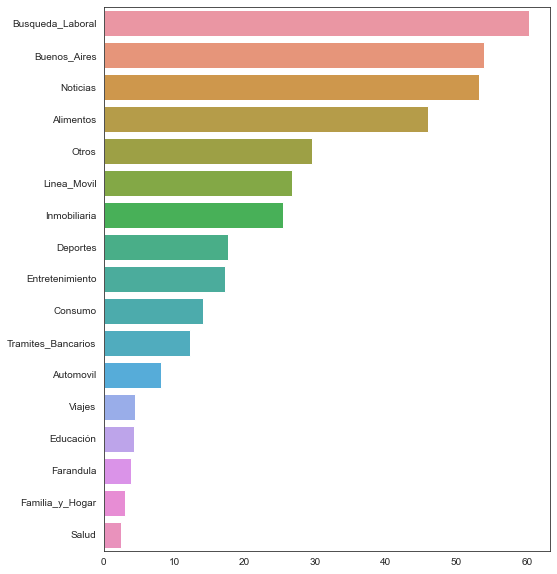

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
print('Porcentaje de Visitas por Rubro')
plt.rcParams["figure.figsize"] = (8,10)
sns.set_style('white')
#dd is a dataframe
x = dd['Porc'].to_list()
y = dd['Rubro'].to_list()

sns.barplot(x, y)
plt.show()

Como puede apreciarse en las tablas anteriores, entre la mayor cantidad de visitas por rubro, un 59% de los dispositivos visita páginas sobre empleos, un 53% visita páginas relacionadas a Buenos Aires, un 48,6% dominios referidos a noticias y un 43% visita dominios relacionados con comida y alimentos.

           domain_type  # Devices Unique
13               Otros             40120
3     Busqueda_Laboral             37706
0            Alimentos             33602
2         Buenos_Aires             32113
12            Noticias             29016
10        Inmobiliaria             20536
11         Linea_Movil             13170
5             Deportes             12185
15  Tramites_Bancarios              8085
7      Entretenimiento              7198

 Eje x: Cantidad de dispositivos únicos, Eje y: Cantidad de tipos de dominios únicos


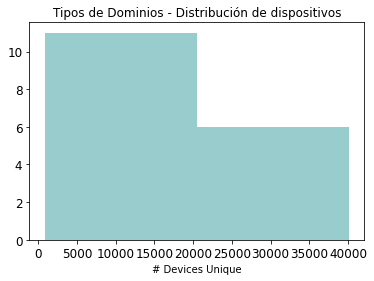

In [252]:
data_grafico = data[['device_idx','domain_type']]
data_grafico = data_grafico.groupby(["domain_type"]).nunique()
print(data_grafico.reset_index().sort_values('device_idx',ascending=False).rename(columns={'device_idx':
                                                                                          '# Devices Unique'}).head(10))
#fig, ax = plt.subplots() 
plt.figure(figsize=(6,4)) 
plt.title("Tipos de Dominios - Distribución de dispositivos")
# we can pass keyword arguments for each individual component of the plot
#We can pass in the variable we want to visualize along with keyword arguments for each of the individual
#components of the plot.
sns.distplot(data_grafico.reset_index().rename(columns={'device_idx':'# Devices Unique'})['# Devices Unique'], \
             kde=False, hist_kws={'color': 'Teal'});
print('\n Eje x: Cantidad de dispositivos únicos, Eje y: Cantidad de tipos de dominios únicos')

Dominios - Distribución de dispositivos


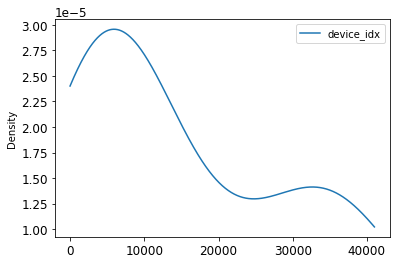

In [294]:
print("Dominios - Distribución de dispositivos")
data_grafico.plot.kde(ind=np.array(range(0,41000)));

Más de 35.000 dispositivos visitan 6 rubros distintos. Menos de 15.000 dispositivos visitan más de 10 secciones distintas.   
Es decir, pocos tipos de dominios concentran a la mayor parte de la población de estudio.

**Analisis descriptivo de los dominios vs genero - bivariado**

In [253]:
pd.set_option("display.max_rows", 50)
data_dom = data[['device_idx','label','feature_detail','domain_type']]
data_dom

,device_idx,label,feature_detail,domain_type
9,392.0,2.0,bumeran.com.ar,Busqueda_Laboral
15,930.0,2.0,zonajobs.com.ar,Busqueda_Laboral
29,1145.0,2.0,veadigital.com.ar,Alimentos
30,1145.0,2.0,bumeran.com.ar,Busqueda_Laboral
32,1145.0,2.0,ofertas.movistar.com.ar,Linea_Movil
...,...,...,...,...
2445198,101820.0,2.0,miba.buenosaires.gob.ar,Buenos_Aires
2445199,101820.0,2.0,gba.gob.ar,Buenos_Aires
2445205,101862.0,2.0,vix.com,Entretenimiento
2445209,101862.0,2.0,minutouno.com,Deportes


In [254]:
100*pd.value_counts(data_dom.label)/data_dom.shape[0]

3.0    51.846537
2.0    48.153463
Name: label, dtype: float64

En cuanto a finromación sobre dominios, existe una distribución de 52% género femenino y 48% género masculino.

In [255]:
#genero variable binaria 1 y 0
data_dom['fem']=np.where(data_dom.label==3,1,0)
print(100*pd.value_counts(data_dom.fem)/data_dom.shape[0])

1    51.846537
0    48.153463
Name: fem, dtype: float64


Tipos de Dominio y % Dispositivos por Género


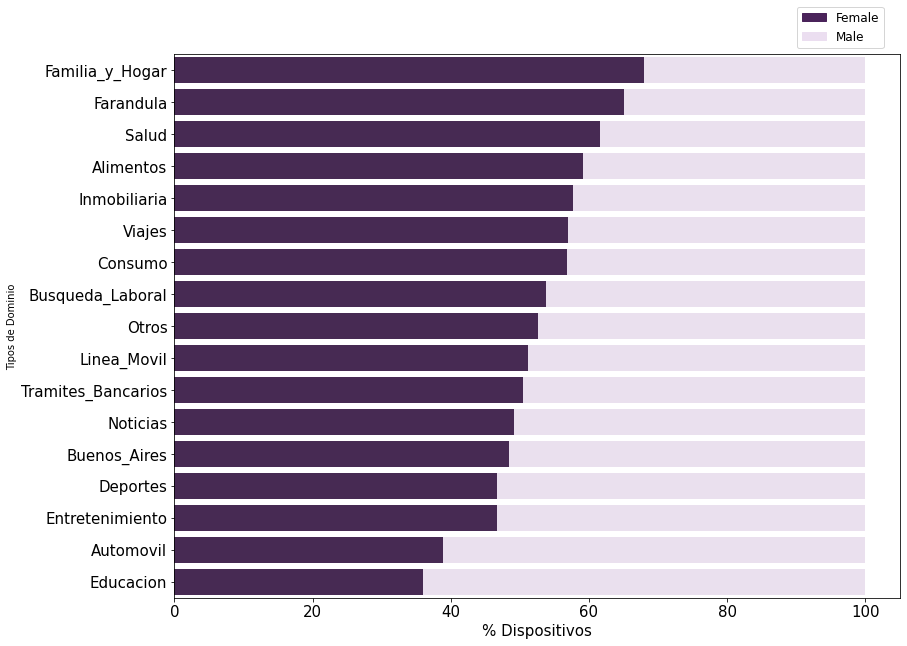

In [256]:
df = data_dom.copy()
print('Tipos de Dominio y % Dispositivos por Género')
## load dataset
tips = df.copy()

# set the figure size
plt.figure(figsize=(13, 10))

# from raw value to percentage
total = tips.groupby('domain_type')['device_idx'].agg(['nunique']).reset_index()
female = tips[tips.label==3].groupby('domain_type')['device_idx'].agg(['nunique']).reset_index()
female['nunique'] = [i / j * 100 for i,j in zip(female['nunique'], total['nunique'])]#aux['div'] #
total['nunique'] = [i / j * 100 for i,j in zip(total['nunique'], total['nunique'])]
total = total.sort_values('nunique', ascending=False)
female = female.sort_values('nunique', ascending=False)

# bar chart 1 -> top bars (group of 'Male')
bar1 = sns.barplot(x="nunique",  y="domain_type", data=total, color='#EBDEF0')

# bar chart 2 -> bottom bars (group of 'Female')
bar2 = sns.barplot(x="nunique", y="domain_type", data=female, color='#4A235A')

# add legend 
top_bar = mpatches.Patch(color='#4A235A', label='Female')
bottom_bar = mpatches.Patch(color='#EBDEF0', label='Male')
plt.legend(handles=[top_bar, bottom_bar], loc='left', bbox_to_anchor=(0.85,1.0), fontsize=12)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=15)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)
    
plt.xlabel("% Dispositivos")
plt.ylabel("Tipos de Dominio")

# show the graph
plt.show()

La nueva variable de tipos de dominio presenta variabilidad con el género.   
Los rubros de familia, farándula, alimentos, consumo y salud tienen una marcada predisposición hacia el género femenino mas que al masculino.   
En cambio, rubros como electrónica, automóviles, educación y deportes son visitados más por el género masculino que femenino.   
Por su parte, Buenos Aires, Noticias, Entretenimiento, Trámites y rubros sobre líneas de celular/ teléfono son visitados de forma pareja respecto a género.

*Grafico bivariado para cada tipo de dominio*

Tipo de Dominio Familia y % Dispositivos por Género


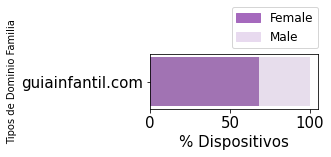

In [257]:
df = data_dom[data_dom['domain_type']=='Familia_y_Hogar']
print('Tipo de Dominio Familia y % Dispositivos por Género')
## load dataset
tips = df.copy()

# set the figure size
plt.figure(figsize=(3, 1))

# from raw value to percentage
total = tips.groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female = tips[tips.label==3].groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female['nunique'] = [i / j * 100 for i,j in zip(female['nunique'], total['nunique'])]#aux['div'] #
total['nunique'] = [i / j * 100 for i,j in zip(total['nunique'], total['nunique'])]
total = total.sort_values('nunique', ascending=False)
female = female.sort_values('nunique', ascending=False)

# bar chart 1 -> top bars (group of 'Male')
bar1 = sns.barplot(x="nunique",  y="feature_detail", data=total, color='#E8DAEF')

# bar chart 2 -> bottom bars (group of 'Female')
bar2 = sns.barplot(x="nunique", y="feature_detail", data=female, color='#A569BD')

# add legend 
top_bar = mpatches.Patch(color='#A569BD', label='Female')
bottom_bar = mpatches.Patch(color='#E8DAEF', label='Male')
plt.legend(handles=[top_bar, bottom_bar], loc='left', bbox_to_anchor=(0.45,1.0), fontsize=12)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=15)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)
plt.xlabel("% Dispositivos")
plt.ylabel("Tipos de Dominio Familia")
# show the graph
plt.show()

Dentro del rubro familiar, como se observó en el primer gráfico, son mayoría de mujeres las que visitan este tipo de sitios.

Tipo de Dominio Farandula y % Dispositivos por Género


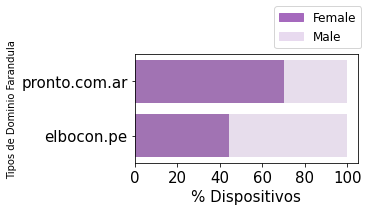

In [258]:
df = data_dom[data_dom['domain_type']=='Farandula']
print('Tipo de Dominio Farandula y % Dispositivos por Género')
## load dataset
tips = df.copy()

# set the figure size
plt.figure(figsize=(4, 2))

# from raw value to percentage
total = tips.groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female = tips[tips.label==3].groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female['nunique'] = [i / j * 100 for i,j in zip(female['nunique'], total['nunique'])]#aux['div'] #
total['nunique'] = [i / j * 100 for i,j in zip(total['nunique'], total['nunique'])]
total = total.sort_values('nunique', ascending=False)
female = female.sort_values('nunique', ascending=False)

# bar chart 1 -> top bars (group of 'Male')
bar1 = sns.barplot(x="nunique",  y="feature_detail", data=total, color='#E8DAEF')

# bar chart 2 -> bottom bars (group of 'Female')
bar2 = sns.barplot(x="nunique", y="feature_detail", data=female, color='#A569BD')

# add legend 
top_bar = mpatches.Patch(color='#A569BD', label='Female')
bottom_bar = mpatches.Patch(color='#E8DAEF', label='Male')
plt.legend(handles=[top_bar, bottom_bar], loc='left', bbox_to_anchor=(0.6,1.0), fontsize=12)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=15)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)
plt.xlabel("% Dispositivos")
plt.ylabel("Tipos de Dominio Farandula")
# show the graph
plt.show()

Respecto al rubro farándula, el dominio con más porcentaje de visitas de género femenino es "universoalessandra", lo cual tiene sentido al tener que ver con sexología, orientado al sexo femenino.   
Si bien este rubro es mayormente visto por mujeres, dominios como "tynmagazine", "delirio", "laprensa" y "revistaorsai" poseen más visitas masculinas que femeninas dentro del total de visitas de cada uno.

Tipo de Dominio Alimentos y % Dispositivos por Género


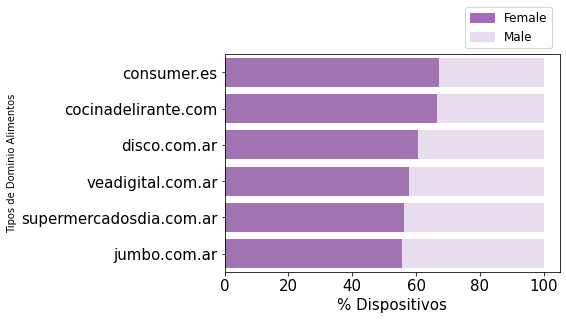

In [259]:
df = data_dom[data_dom['domain_type']=='Alimentos']
print('Tipo de Dominio Alimentos y % Dispositivos por Género')
## load dataset
tips = df.copy()

# set the figure size
plt.figure(figsize=(6, 4))

# from raw value to percentage
total = tips.groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female = tips[tips.label==3].groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female['nunique'] = [i / j * 100 for i,j in zip(female['nunique'], total['nunique'])]#aux['div'] #
total['nunique'] = [i / j * 100 for i,j in zip(total['nunique'], total['nunique'])]
total = total.sort_values('nunique', ascending=False)
female = female.sort_values('nunique', ascending=False)

# bar chart 1 -> top bars (group of 'Male')
bar1 = sns.barplot(x="nunique",  y="feature_detail", data=total, color='#E8DAEF')

# bar chart 2 -> bottom bars (group of 'Female')
bar2 = sns.barplot(x="nunique", y="feature_detail", data=female, color='#A569BD')

# add legend 
top_bar = mpatches.Patch(color='#A569BD', label='Female')
bottom_bar = mpatches.Patch(color='#E8DAEF', label='Male')
plt.legend(handles=[top_bar, bottom_bar], loc='left', bbox_to_anchor=(0.7,1.0), fontsize=12)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=15)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)
plt.xlabel("% Dispositivos")
plt.ylabel("Tipos de Dominio Alimentos")
# show the graph
plt.show()

En Alimentos, los sitios que hacen referencia a recetas de cocina, platos gourmet, dietéticas y gastronomía tienen porcentajes de visitias altamente femenimos.   
En cambio, la mayoría en género masculino tiene que ver con vinos, comida italiana y bodegas.   
Se vislumbran de este modo ciertas tendencias en intereses por género.

Tipo de Dominio Consumo y % Dispositivos por Género


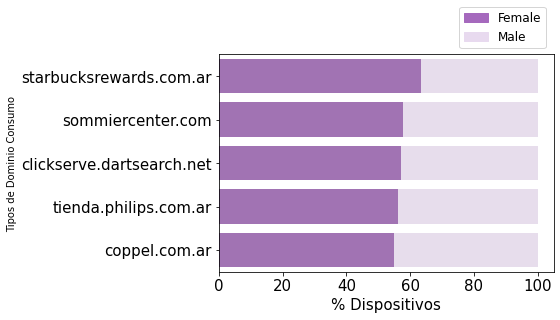

In [260]:
df = data_dom[data_dom['domain_type']=='Consumo']
print('Tipo de Dominio Consumo y % Dispositivos por Género')
## load dataset
tips = df.copy()

# set the figure size
plt.figure(figsize=(6, 4))

# from raw value to percentage
total = tips.groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female = tips[tips.label==3].groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female['nunique'] = [i / j * 100 for i,j in zip(female['nunique'], total['nunique'])]#aux['div'] #
total['nunique'] = [i / j * 100 for i,j in zip(total['nunique'], total['nunique'])]
total = total.sort_values('nunique', ascending=False)
female = female.sort_values('nunique', ascending=False)

# bar chart 1 -> top bars (group of 'Male')
bar1 = sns.barplot(x="nunique",  y="feature_detail", data=total, color='#E8DAEF')

# bar chart 2 -> bottom bars (group of 'Female')
bar2 = sns.barplot(x="nunique", y="feature_detail", data=female, color='#A569BD')

# add legend 
top_bar = mpatches.Patch(color='#A569BD', label='Female')
bottom_bar = mpatches.Patch(color='#E8DAEF', label='Male')
plt.legend(handles=[top_bar, bottom_bar], loc='left', bbox_to_anchor=(0.7,1.0), fontsize=12)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=15)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)
plt.xlabel("% Dispositivos")
plt.ylabel("Tipos de Dominio Consumo")
# show the graph
plt.show()

En lo que es Consumo, se incluyen dominios de páginas web de indumentaria mayoritariamente, aunque también hay dominios que refieren al shop online variado.   
El sitio "millenialsbikinis" tiene un 100% de visitas de género femenino, lo cual tiene lógica ya que en lo que se refiere a trajes de baño, "bikini" es un término para las prendas de mujeres.  
En los demás dominios, es notoria también la mayoría femenina.   
Solo en dominios como "digitalmarket", "ofertaselectronicas" y otras páginas de indumentaria masculina como "mohammed", "romindumentaria", el porcentaje de visitas es mayoritariamente masculino.

Tipo de Dominio Salud y % Dispositivos por Género


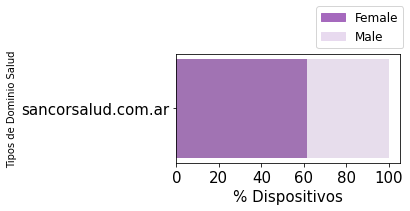

In [261]:
df = data_dom[data_dom['domain_type']=='Salud']
print('Tipo de Dominio Salud y % Dispositivos por Género')
## load dataset
tips = df.copy()

# set the figure size
plt.figure(figsize=(4, 2))

# from raw value to percentage
total = tips.groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female = tips[tips.label==3].groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female['nunique'] = [i / j * 100 for i,j in zip(female['nunique'], total['nunique'])]#aux['div'] #
total['nunique'] = [i / j * 100 for i,j in zip(total['nunique'], total['nunique'])]
total = total.sort_values('nunique', ascending=False)
female = female.sort_values('nunique', ascending=False)

# bar chart 1 -> top bars (group of 'Male')
bar1 = sns.barplot(x="nunique",  y="feature_detail", data=total, color='#E8DAEF')

# bar chart 2 -> bottom bars (group of 'Female')
bar2 = sns.barplot(x="nunique", y="feature_detail", data=female, color='#A569BD')

# add legend 
top_bar = mpatches.Patch(color='#A569BD', label='Female')
bottom_bar = mpatches.Patch(color='#E8DAEF', label='Male')
plt.legend(handles=[top_bar, bottom_bar], loc='left', bbox_to_anchor=(0.6,1.0), fontsize=12)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=15)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)
plt.xlabel("% Dispositivos")
plt.ylabel("Tipos de Dominio Salud")
# show the graph
plt.show()

Cuando se trata de salud, los dominios son mayoritariamente visitados por el género femenino.     
En particular, "elmedicointeractivo.com" y el sitio de "emergencias" son los que más proporción de mujeres tienen entre todas las visitas.   
Luego, "diabetes.org" es el dominio más buscado por el género masculino por poca diferencia.

Tipo de Dominio Inmobiliaria y % Dispositivos por Género


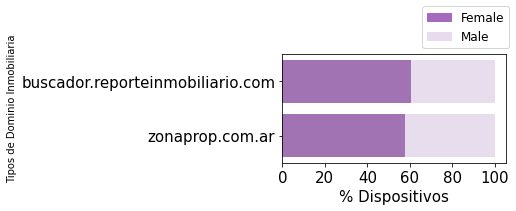

In [262]:
df = data_dom[data_dom['domain_type']=='Inmobiliaria']
print('Tipo de Dominio Inmobiliaria y % Dispositivos por Género')
## load dataset
tips = df.copy()

# set the figure size
plt.figure(figsize=(4, 2))

# from raw value to percentage
total = tips.groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female = tips[tips.label==3].groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female['nunique'] = [i / j * 100 for i,j in zip(female['nunique'], total['nunique'])]#aux['div'] #
total['nunique'] = [i / j * 100 for i,j in zip(total['nunique'], total['nunique'])]
total = total.sort_values('nunique', ascending=False)
female = female.sort_values('nunique', ascending=False)

# bar chart 1 -> top bars (group of 'Male')
bar1 = sns.barplot(x="nunique",  y="feature_detail", data=total, color='#E8DAEF')

# bar chart 2 -> bottom bars (group of 'Female')
bar2 = sns.barplot(x="nunique", y="feature_detail", data=female, color='#A569BD')

# add legend 
top_bar = mpatches.Patch(color='#A569BD', label='Female')
bottom_bar = mpatches.Patch(color='#E8DAEF', label='Male')
plt.legend(handles=[top_bar, bottom_bar], loc='left', bbox_to_anchor=(0.6,1.0), fontsize=12)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=15)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)
plt.xlabel("% Dispositivos")
plt.ylabel("Tipos de Dominio Inmobiliaria")
# show the graph
plt.show()

En el rubro de Inmobiliaria, hay muchos dominios incluidos.   
Como se observó anteriormente, la distribución femenino - masculino es algo desapareja, ya que gana el género femenino, componiendo cerca del 60% de las visitas en este rubro.   
Sin emabrgo, al detallarlo, se encuentran algunos pocos sitios con mayoría de visitas masculinas.

Tipo de Dominio Viajes y % Dispositivos por Género


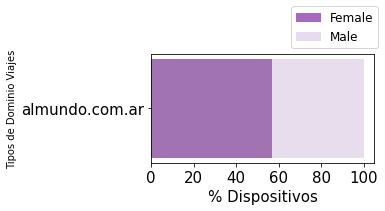

In [263]:
df = data_dom[data_dom['domain_type']=='Viajes']
print('Tipo de Dominio Viajes y % Dispositivos por Género')
## load dataset
tips = df.copy()

# set the figure size
plt.figure(figsize=(4, 2))

# from raw value to percentage
total = tips.groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female = tips[tips.label==3].groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female['nunique'] = [i / j * 100 for i,j in zip(female['nunique'], total['nunique'])]#aux['div'] #
total['nunique'] = [i / j * 100 for i,j in zip(total['nunique'], total['nunique'])]
total = total.sort_values('nunique', ascending=False)
female = female.sort_values('nunique', ascending=False)

# bar chart 1 -> top bars (group of 'Male')
bar1 = sns.barplot(x="nunique",  y="feature_detail", data=total, color='#E8DAEF')

# bar chart 2 -> bottom bars (group of 'Female')
bar2 = sns.barplot(x="nunique", y="feature_detail", data=female, color='#A569BD')

# add legend 
top_bar = mpatches.Patch(color='#A569BD', label='Female')
bottom_bar = mpatches.Patch(color='#E8DAEF', label='Male')
plt.legend(handles=[top_bar, bottom_bar], loc='left', bbox_to_anchor=(0.6,1.0), fontsize=12)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=15)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)
plt.xlabel("% Dispositivos")
plt.ylabel("Tipos de Dominio Viajes")
# show the graph
plt.show()

Viajes tiene mayoría de visitas femeninas, pero existe cierta variabilidad al obervar el detalle en dicho rubro.   

Tipo de Dominio Empleos y % Dispositivos por Género


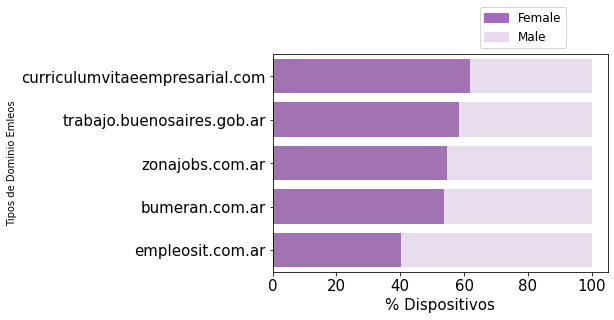

In [264]:
df = data_dom[data_dom['domain_type']=='Busqueda_Laboral']
print('Tipo de Dominio Empleos y % Dispositivos por Género')
## load dataset
tips = df.copy()

# set the figure size
plt.figure(figsize=(6, 4))

# from raw value to percentage
total = tips.groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female = tips[tips.label==3].groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female['nunique'] = [i / j * 100 for i,j in zip(female['nunique'], total['nunique'])]#aux['div'] #
total['nunique'] = [i / j * 100 for i,j in zip(total['nunique'], total['nunique'])]
total = total.sort_values('nunique', ascending=False)
female = female.sort_values('nunique', ascending=False)

# bar chart 1 -> top bars (group of 'Male')
bar1 = sns.barplot(x="nunique",  y="feature_detail", data=total, color='#E8DAEF')

# bar chart 2 -> bottom bars (group of 'Female')
bar2 = sns.barplot(x="nunique", y="feature_detail", data=female, color='#A569BD')

# add legend 
top_bar = mpatches.Patch(color='#A569BD', label='Female')
bottom_bar = mpatches.Patch(color='#E8DAEF', label='Male')
plt.legend(handles=[top_bar, bottom_bar], loc='left', bbox_to_anchor=(0.6,1.0), fontsize=12)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=15)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)
plt.xlabel("% Dispositivos")
plt.ylabel("Tipos de Dominio Emleos")
# show the graph
plt.show()

Búsqueda laboral presenta gran variabilidad al cruzarlo con la variable target.   
Por un lado, dominios de bumeran tienen asociadas visitas de género femenino más que masculino, como también sitios de trabajo freelance.   
Por otro lado, sitios de búsquedas laborales afuera de argentina como "indeed", "grabjobs" o "jobleads" son más comunes en el género masculino. También, el dominio de linekdin suele ser más visitado por hombres que por mujeres.

Tipo de Dominio Linea Movil y % Dispositivos por Género


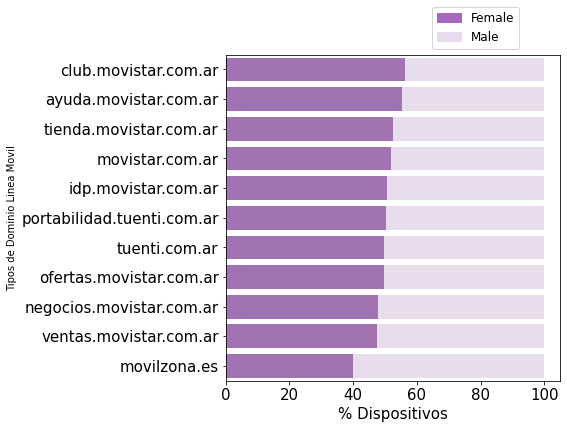

In [265]:
df = data_dom[data_dom['domain_type']=='Linea_Movil']
print('Tipo de Dominio Linea Movil y % Dispositivos por Género')
## load dataset
tips = df.copy()

# set the figure size
plt.figure(figsize=(6, 6))

# from raw value to percentage
total = tips.groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female = tips[tips.label==3].groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female['nunique'] = [i / j * 100 for i,j in zip(female['nunique'], total['nunique'])]#aux['div'] #
total['nunique'] = [i / j * 100 for i,j in zip(total['nunique'], total['nunique'])]
total = total.sort_values('nunique', ascending=False)
female = female.sort_values('nunique', ascending=False)

# bar chart 1 -> top bars (group of 'Male')
bar1 = sns.barplot(x="nunique",  y="feature_detail", data=total, color='#E8DAEF')

# bar chart 2 -> bottom bars (group of 'Female')
bar2 = sns.barplot(x="nunique", y="feature_detail", data=female, color='#A569BD')

# add legend 
top_bar = mpatches.Patch(color='#A569BD', label='Female')
bottom_bar = mpatches.Patch(color='#E8DAEF', label='Male')
plt.legend(handles=[top_bar, bottom_bar], loc='left', bbox_to_anchor=(0.6,1.0), fontsize=12)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=15)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)
plt.xlabel("% Dispositivos")
plt.ylabel("Tipos de Dominio Linea Movil")
# show the graph
plt.show()

En lo que refiere a líneas de celulares o teléfonos móviles, como se observa en el gráfico existe variabilidad al cruzar la información con el género.   

Tipo de Dominio Tramites y % Dispositivos por Género


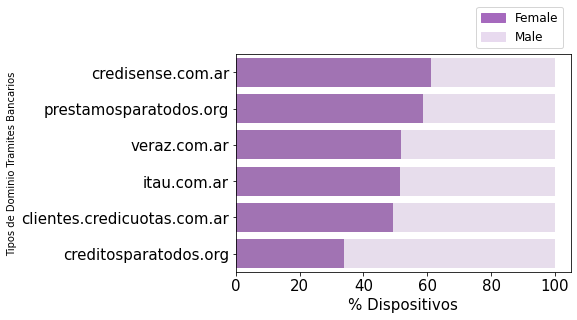

In [266]:
df = data_dom[data_dom['domain_type']=='Tramites_Bancarios']
print('Tipo de Dominio Tramites y % Dispositivos por Género')
## load dataset
tips = df.copy()

# set the figure size
plt.figure(figsize=(6,4))

# from raw value to percentage
total = tips.groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female = tips[tips.label==3].groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female['nunique'] = [i / j * 100 for i,j in zip(female['nunique'], total['nunique'])]#aux['div'] #
total['nunique'] = [i / j * 100 for i,j in zip(total['nunique'], total['nunique'])]
total = total.sort_values('nunique', ascending=False)
female = female.sort_values('nunique', ascending=False)

# bar chart 1 -> top bars (group of 'Male')
bar1 = sns.barplot(x="nunique",  y="feature_detail", data=total, color='#E8DAEF')

# bar chart 2 -> bottom bars (group of 'Female')
bar2 = sns.barplot(x="nunique", y="feature_detail", data=female, color='#A569BD')

# add legend 
top_bar = mpatches.Patch(color='#A569BD', label='Female')
bottom_bar = mpatches.Patch(color='#E8DAEF', label='Male')
plt.legend(handles=[top_bar, bottom_bar], loc='left', bbox_to_anchor=(0.7,1.0), fontsize=12)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=15)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)
plt.xlabel("% Dispositivos")
plt.ylabel("Tipos de Dominio Tramites Bancarios")
# show the graph
plt.show()

El rubro de trámites y bancos tiene proporción de visitas similares en cuanto a género.   
Sin embargo, se destacan algnos dominios con mayorías de uno y otro género.   
Por ejemplo, el dominio del banco Itaú es más visitado por hombres que por muejeres. Y el sitio de Mercado Pago es más frecuentado por el género femenino

Tipo de Dominio Entretenimiento y % Dispositivos por Género


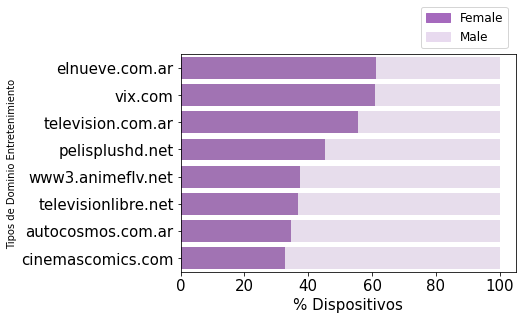

In [267]:
df = data_dom[data_dom['domain_type']=='Entretenimiento']
print('Tipo de Dominio Entretenimiento y % Dispositivos por Género')
## load dataset
tips = df.copy()

# set the figure size
plt.figure(figsize=(6, 4))

# from raw value to percentage
total = tips.groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female = tips[tips.label==3].groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female['nunique'] = [i / j * 100 for i,j in zip(female['nunique'], total['nunique'])]#aux['div'] #
total['nunique'] = [i / j * 100 for i,j in zip(total['nunique'], total['nunique'])]
total = total.sort_values('nunique', ascending=False)
female = female.sort_values('nunique', ascending=False)

# bar chart 1 -> top bars (group of 'Male')
bar1 = sns.barplot(x="nunique",  y="feature_detail", data=total, color='#E8DAEF')

# bar chart 2 -> bottom bars (group of 'Female')
bar2 = sns.barplot(x="nunique", y="feature_detail", data=female, color='#A569BD')

# add legend 
top_bar = mpatches.Patch(color='#A569BD', label='Female')
bottom_bar = mpatches.Patch(color='#E8DAEF', label='Male')
plt.legend(handles=[top_bar, bottom_bar], loc='left', bbox_to_anchor=(0.7,1.0), fontsize=12)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=15)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)
plt.xlabel("% Dispositivos")
plt.ylabel("Tipos de Dominio Entretenimiento")
# show the graph
plt.show()

Tipo de Dominio Noticias y % Dispositivos por Género


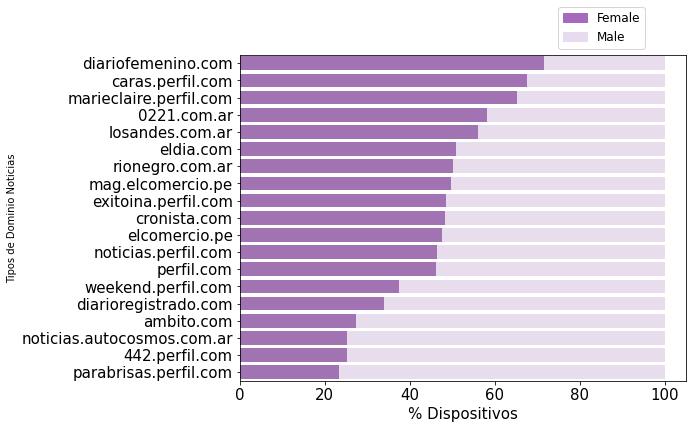

In [268]:
df = data_dom[data_dom['domain_type']=='Noticias']
print('Tipo de Dominio Noticias y % Dispositivos por Género')
## load dataset
tips = df.copy()

# set the figure size
plt.figure(figsize=(8, 6))

# from raw value to percentage
total = tips.groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female = tips[tips.label==3].groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female['nunique'] = [i / j * 100 for i,j in zip(female['nunique'], total['nunique'])]#aux['div'] #
total['nunique'] = [i / j * 100 for i,j in zip(total['nunique'], total['nunique'])]
total = total.sort_values('nunique', ascending=False)
female = female.sort_values('nunique', ascending=False)

# bar chart 1 -> top bars (group of 'Male')
bar1 = sns.barplot(x="nunique",  y="feature_detail", data=total, color='#E8DAEF')

# bar chart 2 -> bottom bars (group of 'Female')
bar2 = sns.barplot(x="nunique", y="feature_detail", data=female, color='#A569BD')

# add legend 
top_bar = mpatches.Patch(color='#A569BD', label='Female')
plt.legend(handles=[top_bar, bottom_bar], loc='left', bbox_to_anchor=(0.7,1.0), fontsize=12)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=15)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)
plt.xlabel("% Dispositivos")
plt.ylabel("Tipos de Dominio Noticias")
# show the graph
plt.show()

Noticias es un rubro visitado en forma pareja por ambos géneros. Sin emabrgo, existe variablidad al observarlo en detalle.   
Tiene sentido que los dominios con mayor proporción de mujeres sean "rouge.perfil.com", que tiene que ver con sección de maquillajes, y "diariofememenino.com", que como su nombre indica, está especialmente dedicado a dicho género.   
Así también hace sentido que dominios como "diariomotor", "hombre.perfil.com" y "noticias.autocosmos" tengan mayoría de visitas masculinas, pues de por si la palabra *hombre* ahce referencia al género. Y *motor* y *autocosmos* tienen que ver con automóviles ademas del rubro noticias, y se osbervó que ese rubro tiene un fuerte componente masculino en cuanto a visitas.

Tipo de Dominio Buenos Aires y % Dispositivos por Género


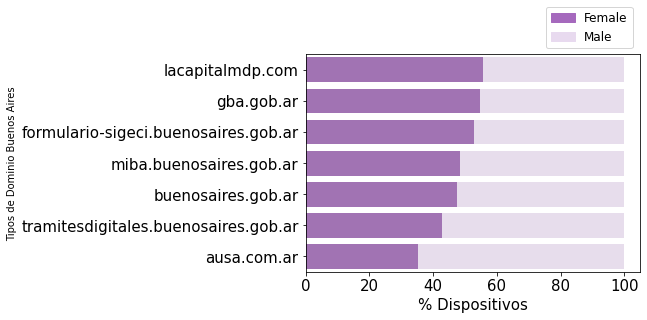

In [269]:
df = data_dom[data_dom['domain_type']=='Buenos_Aires']
print('Tipo de Dominio Buenos Aires y % Dispositivos por Género')
## load dataset
tips = df.copy()

# set the figure size
plt.figure(figsize=(6, 4))

# from raw value to percentage
total = tips.groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female = tips[tips.label==3].groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female['nunique'] = [i / j * 100 for i,j in zip(female['nunique'], total['nunique'])]#aux['div'] #
total['nunique'] = [i / j * 100 for i,j in zip(total['nunique'], total['nunique'])]
total = total.sort_values('nunique', ascending=False)
female = female.sort_values('nunique', ascending=False)

# bar chart 1 -> top bars (group of 'Male')
bar1 = sns.barplot(x="nunique",  y="feature_detail", data=total, color='#E8DAEF')

# bar chart 2 -> bottom bars (group of 'Female')
bar2 = sns.barplot(x="nunique", y="feature_detail", data=female, color='#A569BD')

# add legend 
top_bar = mpatches.Patch(color='#A569BD', label='Female')
bottom_bar = mpatches.Patch(color='#E8DAEF', label='Male')
plt.legend(handles=[top_bar, bottom_bar], loc='left', bbox_to_anchor=(0.7,1.0), fontsize=12)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=15)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)
plt.xlabel("% Dispositivos")
plt.ylabel("Tipos de Dominio Buenos Aires")
# show the graph
plt.show()

El rubro Buenos Aires es parejo en cuanto a visitas por género.   
Se destaca "potenciate" y "laciudadrevista" como dominios con fuerte proporción de visitas femeninas.

Tipo de Dominio Deportes y % Dispositivos por Género


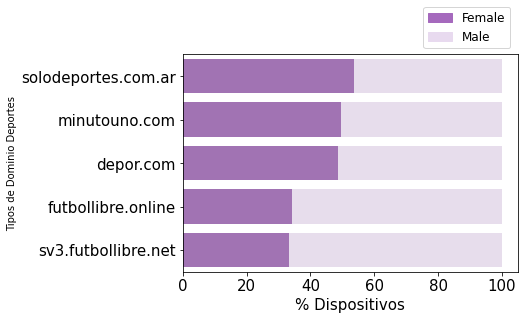

In [270]:
df = data_dom[data_dom['domain_type']=='Deportes']
df = df[df['feature_detail']!='eurosport.com.ar']
print('Tipo de Dominio Deportes y % Dispositivos por Género')
## load dataset
tips = df.copy()

# set the figure size
plt.figure(figsize=(6, 4))

# from raw value to percentage
total = tips.groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female = tips[tips.label==3].groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female['nunique'] = [i / j * 100 for i,j in zip(female['nunique'], total['nunique'])]#aux['div'] #
total['nunique'] = [i / j * 100 for i,j in zip(total['nunique'], total['nunique'])]
total = total.sort_values('nunique', ascending=False)
female = female.sort_values('nunique', ascending=False)

# bar chart 1 -> top bars (group of 'Male')
bar1 = sns.barplot(x="nunique",  y="feature_detail", data=total, color='#E8DAEF')

# bar chart 2 -> bottom bars (group of 'Female')
bar2 = sns.barplot(x="nunique", y="feature_detail", data=female, color='#A569BD')

# add legend 
top_bar = mpatches.Patch(color='#A569BD', label='Female')
bottom_bar = mpatches.Patch(color='#E8DAEF', label='Male')
plt.legend(handles=[top_bar, bottom_bar], loc='left', bbox_to_anchor=(0.7,1.0), fontsize=12)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=15)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)
plt.xlabel("% Dispositivos")
plt.ylabel("Tipos de Dominio Deportes")
# show the graph
plt.show()

Deportes es un rubro más visitado por el género masculino que femenino.   
Únicamente el dominio "yopro" resulta ser más visitado por mujeres, siendo que es un e-commerce de productos de proteínas y alimentos deportivos específicos. Luego, "solodeportes" y "maxdeportes" tienen proporción de visitas similares en cuanto a género.   
Los demás dominios son fuertemente masculinos en términos de usuarios que los visitan. Muchos de los cuales hacen referencia a equipos de fútbol, como boca juniors, river plate, san lorenzo, entre otros.

Tipo de Dominio Educación y % Dispositivos por Género


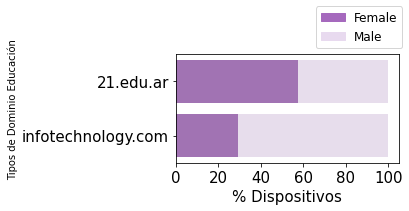

In [271]:
df = data_dom[data_dom['domain_type']=='Educacion']
print('Tipo de Dominio Educación y % Dispositivos por Género')
## load dataset
tips = df.copy()

# set the figure size
plt.figure(figsize=(4, 2))

# from raw value to percentage
total = tips.groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female = tips[tips.label==3].groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female['nunique'] = [i / j * 100 for i,j in zip(female['nunique'], total['nunique'])]#aux['div'] #
total['nunique'] = [i / j * 100 for i,j in zip(total['nunique'], total['nunique'])]
total = total.sort_values('nunique', ascending=False)
female = female.sort_values('nunique', ascending=False)

# bar chart 1 -> top bars (group of 'Male')
bar1 = sns.barplot(x="nunique",  y="feature_detail", data=total, color='#E8DAEF')

# bar chart 2 -> bottom bars (group of 'Female')
bar2 = sns.barplot(x="nunique", y="feature_detail", data=female, color='#A569BD')

# add legend 
top_bar = mpatches.Patch(color='#A569BD', label='Female')
bottom_bar = mpatches.Patch(color='#E8DAEF', label='Male')
plt.legend(handles=[top_bar, bottom_bar], loc='left', bbox_to_anchor=(0.6,1.0), fontsize=12)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=15)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)
plt.xlabel("% Dispositivos")
plt.ylabel("Tipos de Dominio Educación")
# show the graph
plt.show()

El rubro de educación es mayoritariamente visitado por el género masculino. Sin embargo, se observa cierta variabilidad al observar los dominios que lo componen.
Por ejemplo, tiene el dominio “21.edu.ar” es el de la Universidad Siglo 21. Dicha universidad privada, en principio parece ser más buscada por mujeres que hombres.
A su vez, los dominios de “infoteechnology” son más frecuentados por hombres. Esto hace sentido habiendo observado también las proporciones en dominios de empleos, donde el género masculino se inclina por sitios de trabajo orientados al área tecnológica.

Tipo de Dominio Automovil y % Dispositivos por Género


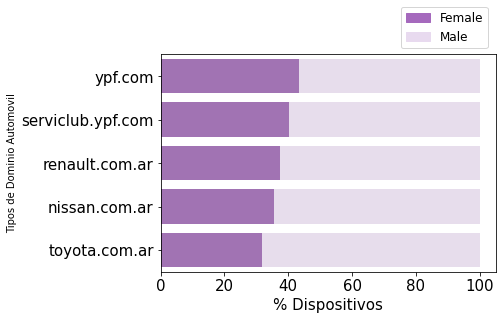

In [272]:
df = data_dom[data_dom['domain_type']=='Automovil']
print('Tipo de Dominio Automovil y % Dispositivos por Género')
## load dataset
tips = df.copy()

# set the figure size
plt.figure(figsize=(6,4))

# from raw value to percentage
total = tips.groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female = tips[tips.label==3].groupby('feature_detail')['device_idx'].agg(['nunique']).reset_index()
female['nunique'] = [i / j * 100 for i,j in zip(female['nunique'], total['nunique'])]#aux['div'] #
total['nunique'] = [i / j * 100 for i,j in zip(total['nunique'], total['nunique'])]
total = total.sort_values('nunique', ascending=False)
female = female.sort_values('nunique', ascending=False)

# bar chart 1 -> top bars (group of 'Male')
bar1 = sns.barplot(x="nunique",  y="feature_detail", data=total, color='#E8DAEF')

# bar chart 2 -> bottom bars (group of 'Female')
bar2 = sns.barplot(x="nunique", y="feature_detail", data=female, color='#A569BD')

# add legend 
top_bar = mpatches.Patch(color='#A569BD', label='Female')
bottom_bar = mpatches.Patch(color='#E8DAEF', label='Male')
plt.legend(handles=[top_bar, bottom_bar], loc='left', bbox_to_anchor=(0.7,1.0), fontsize=12)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=15)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)
plt.xlabel("% Dispositivos")
plt.ylabel("Tipos de Dominio Automovil")
# show the graph
plt.show()

Este rubro, si bien presenta en general más visitas masculinas que femeninas, posee cierta variabilidad con respecto al género.   
Los dominios referidos a fundaciones ypf son ganados por el género femenino, por ejemplo.

In [273]:
pd.DataFrame(data['domain_type'].value_counts()).rename(columns={'domain_type':'Devices'})

,Devices
Otros,76844
Busqueda_Laboral,58445
Buenos_Aires,52405
Noticias,48386
Alimentos,43593
Linea_Movil,22803
Inmobiliaria,20994
Deportes,15111
Tramites_Bancarios,10045
Entretenimiento,7718


**Procesamiento de los datos para incluir en modelos**

In [274]:
#genero variable binaria 1 y 0
data['fem']=np.where(data.label==3,1,0)
print(100*pd.value_counts(data.fem)/data_dom.shape[0])
data = data[['device_idx','feature_detail','domain_type','fem']]
data.head(3)

1    51.846537
0    48.153463
Name: fem, dtype: float64


,device_idx,feature_detail,domain_type,fem
9,392.0,bumeran.com.ar,Busqueda_Laboral,0
15,930.0,zonajobs.com.ar,Busqueda_Laboral,0
29,1145.0,veadigital.com.ar,Alimentos,0


In [275]:
genero=pd.DataFrame(np.unique(data.device_idx).tolist()) #enlisto la totalidad de device id
genero.rename(columns={0:'device_idx'},inplace=True)

genero=pd.merge(genero, data,  how='left', on='device_idx')
genero.drop(columns=['feature_detail'], axis=1,inplace=True)
genero.drop_duplicates('device_idx', keep='first', inplace=True)
genero = genero.sort_values('device_idx')
genero

,device_idx,domain_type,fem
0,1.0,Noticias,1
2,2.0,Deportes,0
6,3.0,Buenos_Aires,0
8,4.0,Buenos_Aires,0
9,5.0,Busqueda_Laboral,0
...,...,...,...
381190,101985.0,Busqueda_Laboral,0
381192,101986.0,Buenos_Aires,1
381194,101987.0,Otros,0
381196,101988.0,Alimentos,0


In [276]:
#separo variable dep de independientes
y=genero['fem']
X=genero.drop(['device_idx','fem'],axis=1)

In [277]:
def get_dummies_fun(df,variable='domain_type',reference_category='Buenos_Aires'): #ouedo poner Otros

    '''get dummies with a reference category.

    '''
    df[variable] = pd.Categorical(df[variable])
    cat_vars=df[variable].cat.categories
    to_keep=[i for i in cat_vars if i not in reference_category]
    for var in to_keep:
        cat_list=variable+'_'+var
        df[cat_list]=np.where(df[variable]==var, 1, 0)
    df.drop(variable,axis=1,  inplace=True)

    return(df)

In [278]:
#hago el one hot encoding
X=get_dummies_fun(X)
X

,domain_type_Alimentos,domain_type_Automovil,domain_type_Busqueda_Laboral,domain_type_Consumo,domain_type_Deportes,domain_type_Educacion,domain_type_Entretenimiento,domain_type_Familia_y_Hogar,domain_type_Farandula,domain_type_Inmobiliaria,domain_type_Linea_Movil,domain_type_Noticias,domain_type_Otros,domain_type_Salud,domain_type_Tramites_Bancarios,domain_type_Viajes
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381190,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
381192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
381194,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
381196,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [279]:
dev = genero[['device_idx']]
dev = dev.dropna()
print(dev.shape)
X= pd.concat([X,dev], axis=1)
#X=X.sort_values('device_idx')
print(X.shape)
X.head()

(99469, 1)
(99469, 17)


,domain_type_Alimentos,domain_type_Automovil,domain_type_Busqueda_Laboral,domain_type_Consumo,domain_type_Deportes,domain_type_Educacion,domain_type_Entretenimiento,domain_type_Familia_y_Hogar,domain_type_Farandula,domain_type_Inmobiliaria,domain_type_Linea_Movil,domain_type_Noticias,domain_type_Otros,domain_type_Salud,domain_type_Tramites_Bancarios,domain_type_Viajes,device_idx
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0
9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0


In [280]:
X.tail()

,domain_type_Alimentos,domain_type_Automovil,domain_type_Busqueda_Laboral,domain_type_Consumo,domain_type_Deportes,domain_type_Educacion,domain_type_Entretenimiento,domain_type_Familia_y_Hogar,domain_type_Farandula,domain_type_Inmobiliaria,domain_type_Linea_Movil,domain_type_Noticias,domain_type_Otros,domain_type_Salud,domain_type_Tramites_Bancarios,domain_type_Viajes,device_idx
381190,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,101985.0
381192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,101986.0
381194,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,101987.0
381196,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,101988.0
381197,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,101989.0


In [281]:
y = genero[['device_idx','fem']]
y = y.dropna()
y=y.sort_values('device_idx')
print(y.shape)
y.head()

(99469, 2)


,device_idx,fem
0,1.0,1
2,2.0,0
6,3.0,0
8,4.0,0
9,5.0,0


In [282]:
y.tail()

,device_idx,fem
381190,101985.0,0
381192,101986.0,1
381194,101987.0,0
381196,101988.0,0
381197,101989.0,1


In [283]:
y = y[['fem']]
df_final = pd.concat([y,X], axis=1)
print(df_final.shape)
df_final.head()

(99469, 18)


,fem,domain_type_Alimentos,domain_type_Automovil,domain_type_Busqueda_Laboral,domain_type_Consumo,domain_type_Deportes,domain_type_Educacion,domain_type_Entretenimiento,domain_type_Familia_y_Hogar,domain_type_Farandula,domain_type_Inmobiliaria,domain_type_Linea_Movil,domain_type_Noticias,domain_type_Otros,domain_type_Salud,domain_type_Tramites_Bancarios,domain_type_Viajes,device_idx
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0
9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0


Se crean a partir de las variables categóricas, variables dummy o indicatrices (1 o 0) ya que los modelos no trabajan con variables categóricas, solamente con variables numéricas, porque utilizan modelos matemáticos detras.

Se separa el datadrame entre las variables dependientes (variables de rubros de dominio) y la variable independiente (variable indicatriz que identifica si la persona es de género femenino o no).

In [284]:
print(df_final.shape)
print(df_final.isnull().sum())

(99469, 18)
fem                               0
domain_type_Alimentos             0
domain_type_Automovil             0
domain_type_Busqueda_Laboral      0
domain_type_Consumo               0
domain_type_Deportes              0
domain_type_Educacion             0
domain_type_Entretenimiento       0
domain_type_Familia_y_Hogar       0
domain_type_Farandula             0
domain_type_Inmobiliaria          0
domain_type_Linea_Movil           0
domain_type_Noticias              0
domain_type_Otros                 0
domain_type_Salud                 0
domain_type_Tramites_Bancarios    0
domain_type_Viajes                0
device_idx                        0
dtype: int64


In [285]:
df_final.to_csv('df_final_domains.csv') #df_final_useragent.csv

In [287]:
df_final.to_csv('df_final_domains_prueba.csv') 